In [17]:
from scipy.integrate import odeint
import numpy as np
from math import sqrt, pi, exp
import matplotlib.pyplot as plt
from scipy import stats 

### Пункт 4

Смоделируем белый шум с инетенсивнотью сигма^2 = 10000 и шагом дискретизации h = 2

In [18]:
sigma = 2
b = 10
m = 6
v0 = 4
x0 = 2

t = np.arange(0, 10, 0.005)

h = 0.005 # шаг интегрирования
n = len(t)

print(h)
print(n)

0.005
2000


In [19]:
V = []
for i in range(1, len(t)):
    V.append(np.random.normal(loc = 0, scale = np.sqrt(sigma**2*(t[i]-t[i-1])), size=1))

In [20]:
A = np.array([[0, 1], [0, -(b / m)]])
B = np.array([[0], [1 / m]])
print(A, "\n",  B)

[[ 0.          1.        ]
 [ 0.         -1.66666667]] 
 [[0.        ]
 [0.16666667]]


[[2]
 [4]]


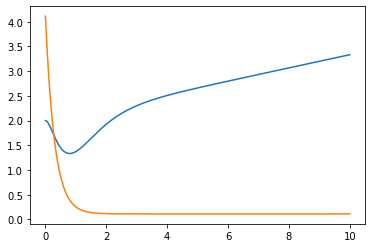

In [21]:
def D_ksi(t):
    return 2 * t * (m / b) * (v0 * (exp(-2*(b/m)*t) - exp(-(b/m)*t)) + (sigma**2 / m**2) * (1 - exp(-(b/m)*t))) + x0
def D_ksi1(t):
    return v0 * exp(-2*(b/m)*t) + (sigma**2 / m**2)

D = np.array(list(map(lambda t: 2 * t * (m / b) * (v0 * (exp(-2*(b/m)*t) - exp(-(b/m)*t)) + (sigma**2 / m**2) * (1 - exp(-(b/m)*t))) + x0, t)))
D1 = np.array(list(map(lambda t: v0 * exp(-2*(b/m)*t) + (sigma**2 / m**2), t)))

X = []
#X = np.zeros((int(n), 2, 1))
X.append(np.array([[2], [4]]))

print(X[0])
plt.plot(t, D)
plt.plot(t, D1)

In [22]:
for i in range(1, n):
    X.append(X[i-1] + A@X[i-1]*h+B*V[i-1])

In [23]:
X_0 = [X[i][0] for i in range(n)]
X_1 = [X[i][1] for i in range(n)]

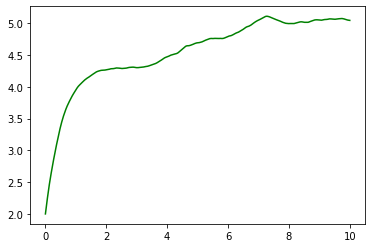

In [24]:
plt.plot(t, np.squeeze(X_0), 'g')

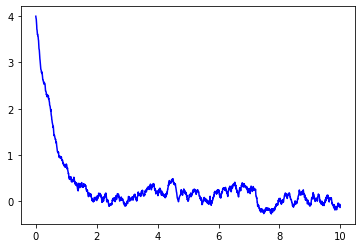

In [25]:
plt.plot(t, np.squeeze(X_1), 'b')

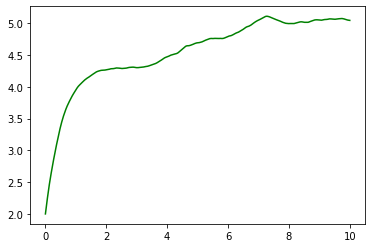

In [26]:
X1 = []
X1.append(np.array([[2], [4]]))

for i in range(1, n):
    X1.append(X[i-1] + A@X1[i-1]*(h/4)+B*V[i-1])
    
X1_0 = [X1[i][0] for i in range(n)]
X1_1 = [X1[i][1] for i in range(n)]

plt.plot(t, np.squeeze(X_0), 'g')

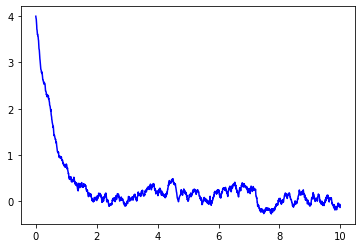

In [27]:
plt.plot(t, np.squeeze(X_1), 'b')

### Пункт 5

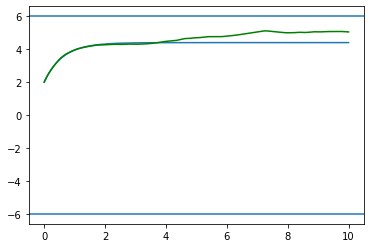

In [31]:

#M = lambda t: (m/b) * v0 * (1 - exp(-(b/m) * t)) + x0

M = np.array(list(map(lambda t: (m/b) * v0 * (1 - exp(-(b/m) * t)) + x0, t)))
#print(M)

y = 3  * sigma
y1 = - 3 * sigma
plt.axhline(y)
plt.axhline(y1)
plt.plot(t, M)
plt.plot(t, np.squeeze(X_0), 'g')

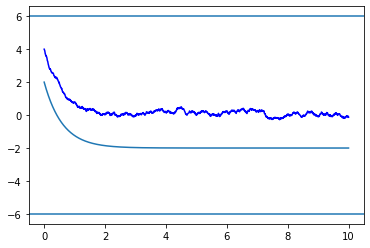

In [32]:
M1 = np.array(list(map(lambda t: - v0 * (1 - exp(-(b/m) * t)) + x0, t)))

plt.axhline(y)
plt.axhline(y1)
plt.plot(t, M1)
plt.plot(t, np.squeeze(X_1), 'b')

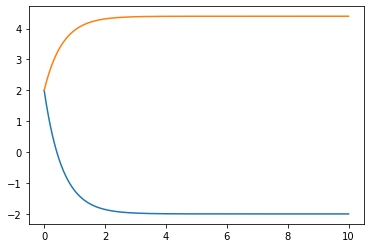

In [33]:
plt.plot(t, M1)
plt.plot(t, M)

### Пункт 6

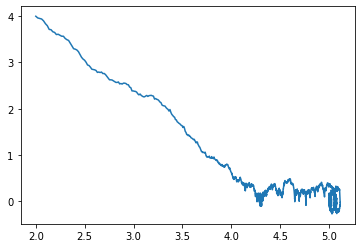

In [34]:
x = np.squeeze(X_0)
y = np.squeeze(X_1)

plt.plot(x, y)
plt.show()